In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('BankChurners.csv')

In [4]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [5]:
data.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [6]:
data.drop(columns='CLIENTNUM', axis=1,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   Attrition_Flag                                                                                                                      10127 non-null  object 
 1   Customer_Age                                                                                                                        10127 non-null  int64  
 2   Gender                                                                                                                              10127 non-null  object 
 3   Dependent_count                                                                  

EDA 

In [8]:
x = data['Attrition_Flag'].value_counts()

import plotly.graph_objects as go

labels = ['Existing Customer', 'Attrited Customer']

fig = go.Figure(data=[go.Pie(labels=labels, values=x, pull=[0, 0.1])])
fig.show()

by looking into this we can see that there are more existing customer than the attrited customer

analysing the categorical feature

In [9]:
data_cat = data.select_dtypes(include=np.object_)
data_cat.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

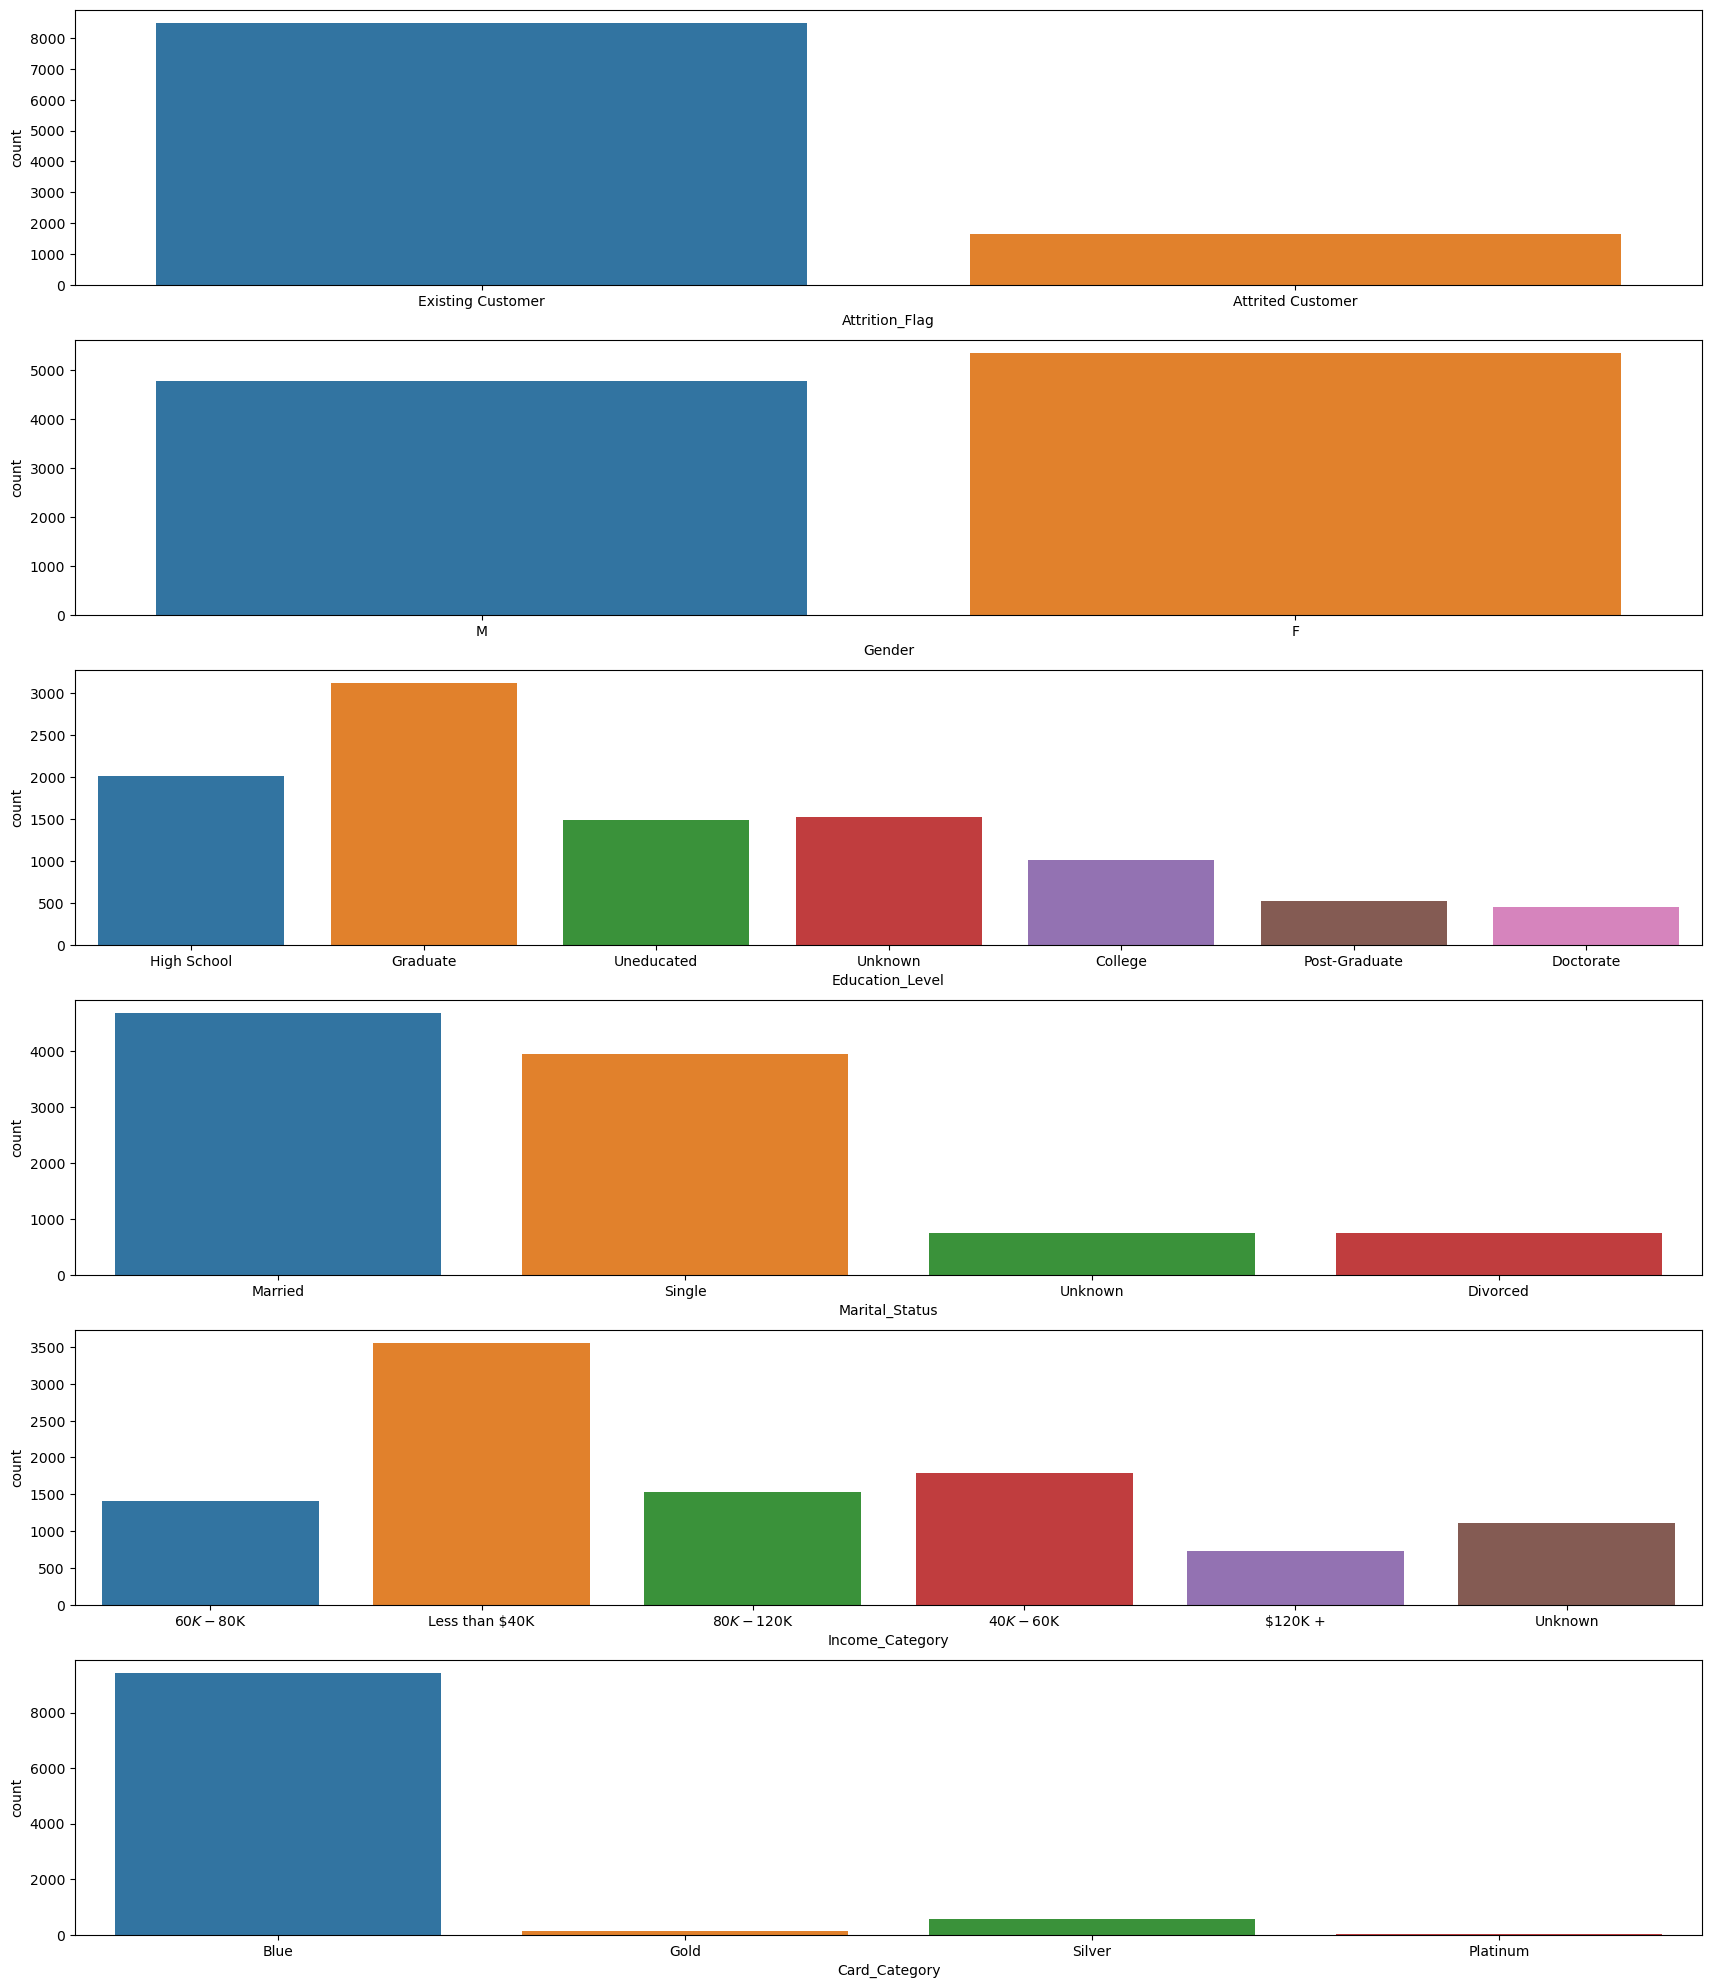

In [10]:
fig,ax=plt.subplots(6,1,figsize=(21,25))
cols=['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']
for i, val in enumerate(cols):
    sns.countplot(x=val,data=data, ax=ax[i])

<Axes: xlabel='Dependent_count', ylabel='count'>

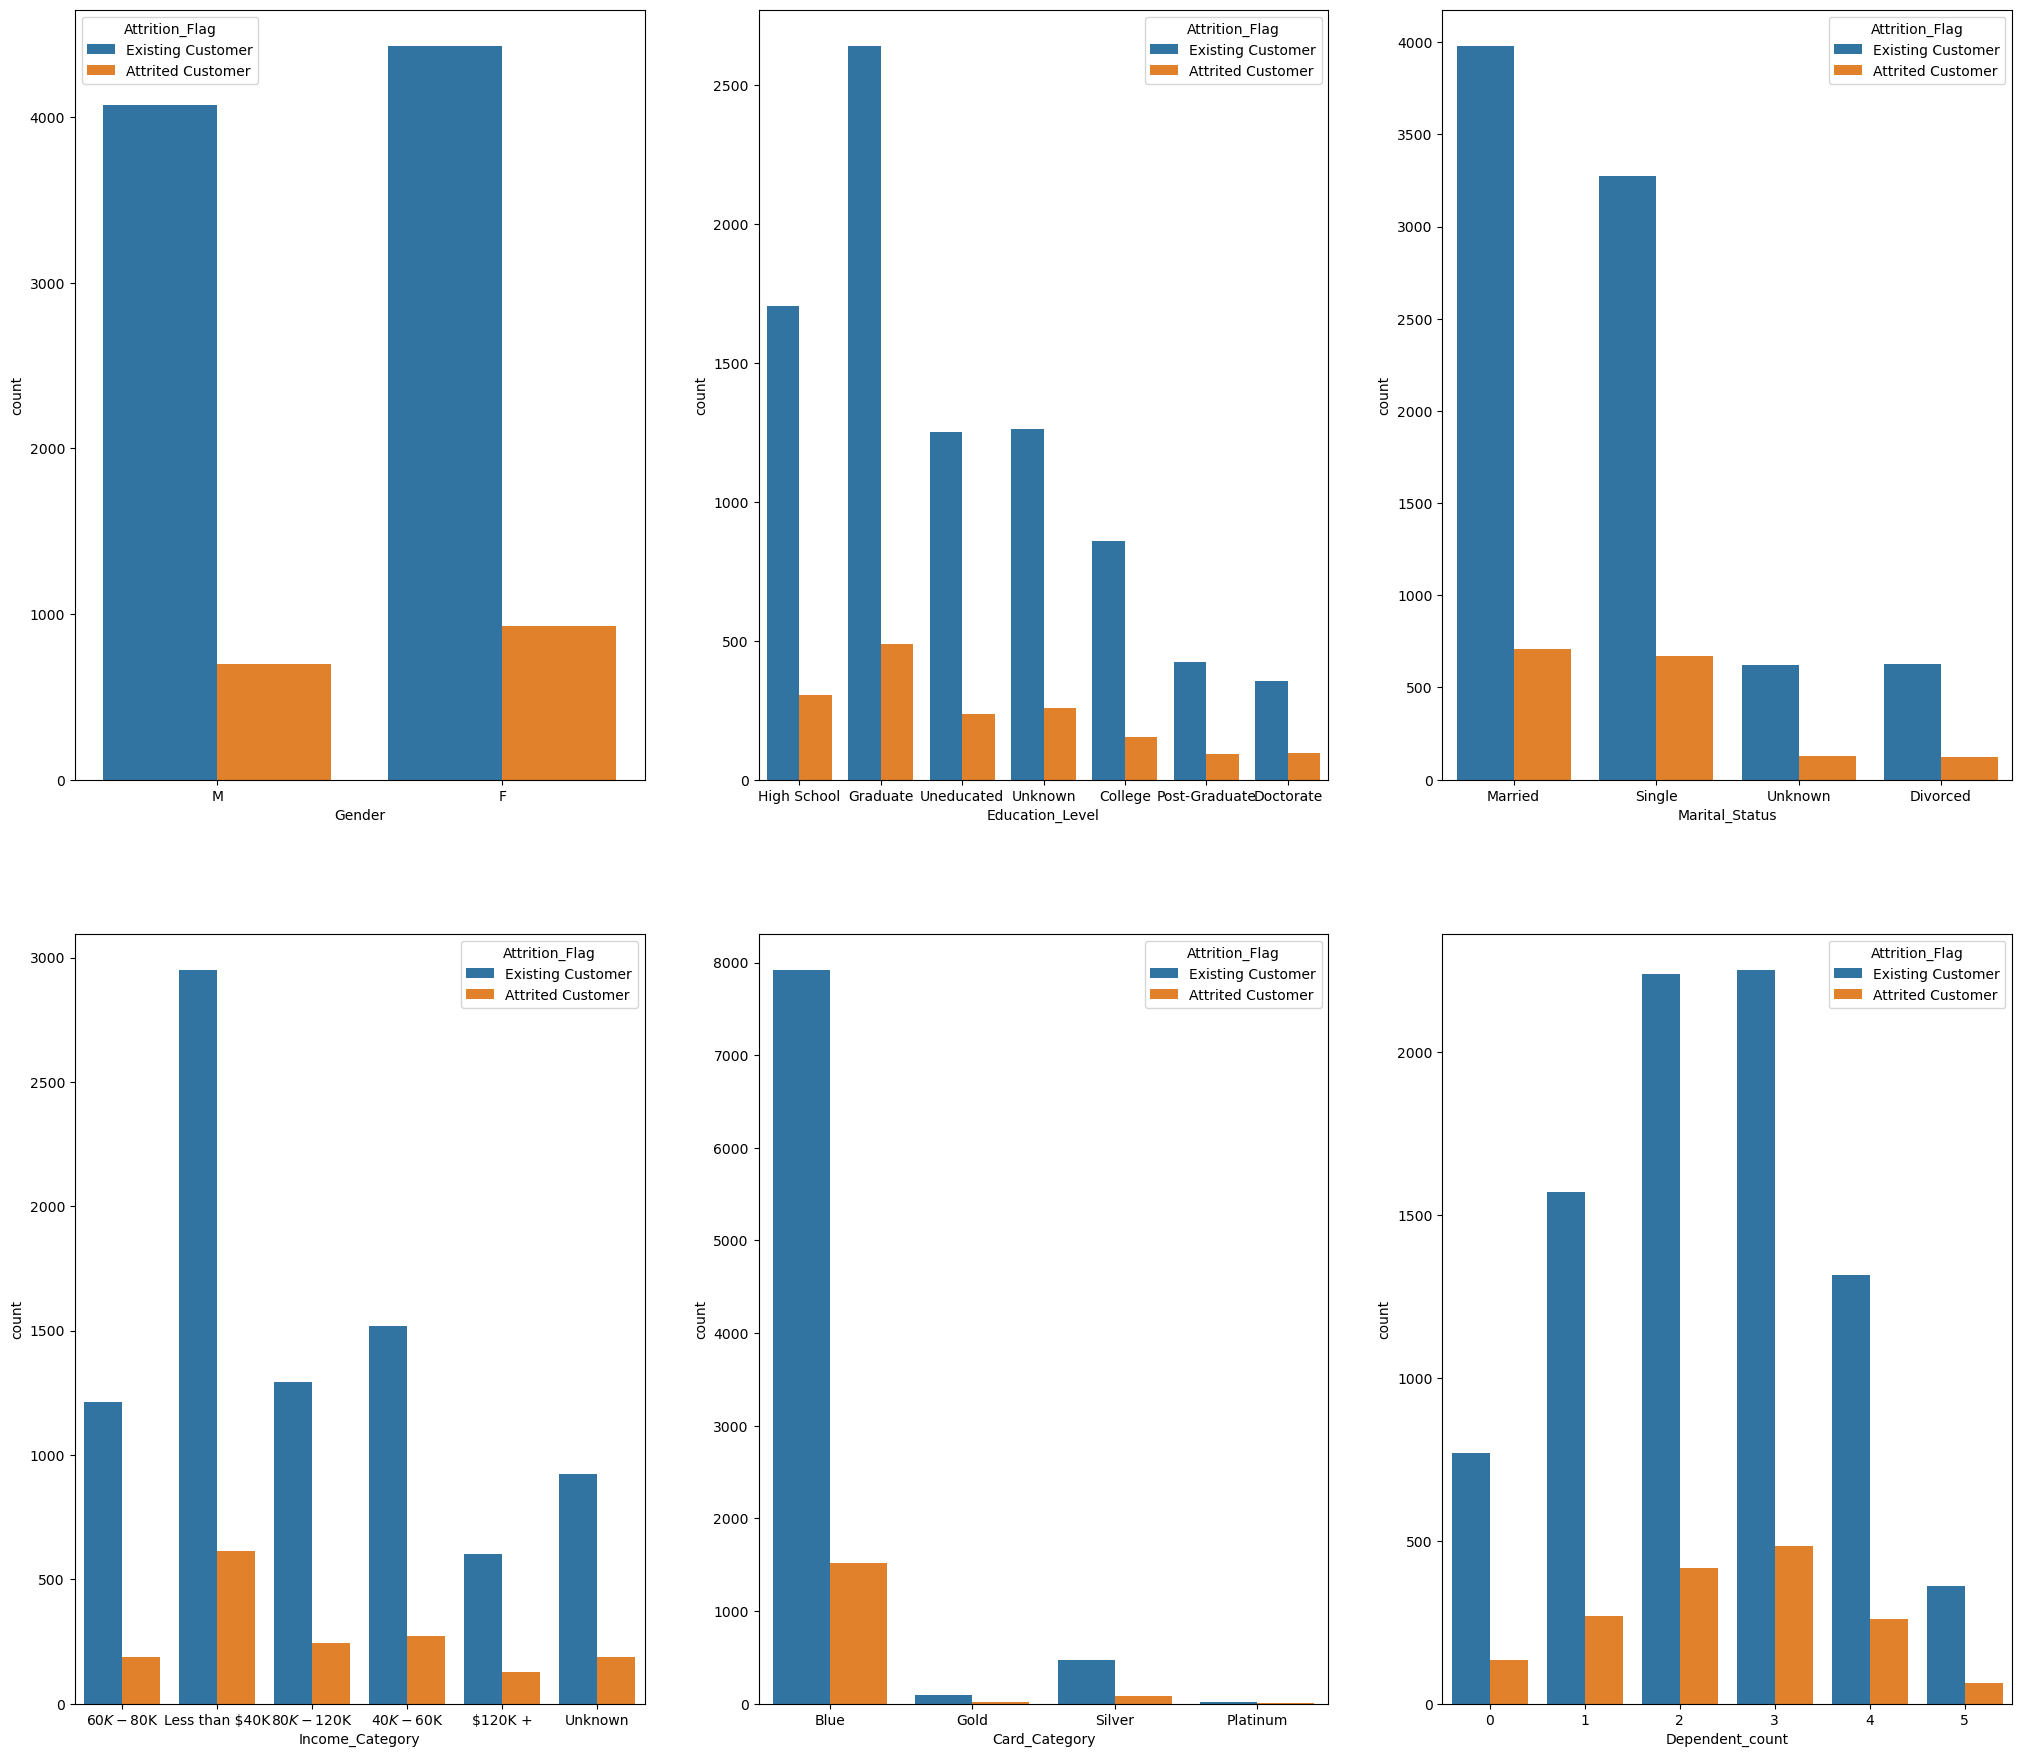

In [11]:
fig, ax = plt.subplots(2,3,figsize=(25,22))

sns.countplot(x='Gender',hue='Attrition_Flag',data=data,ax=ax[0][0])
sns.countplot(x='Education_Level',hue='Attrition_Flag',data=data,ax=ax[0][1])
sns.countplot(x='Marital_Status',hue='Attrition_Flag',data=data,ax=ax[0][2])
sns.countplot(x='Income_Category',hue='Attrition_Flag',data=data,ax=ax[1][0])
sns.countplot(x='Card_Category',hue='Attrition_Flag',data=data,ax=ax[1][1])
sns.countplot(x='Dependent_count',hue='Attrition_Flag',data=data,ax=ax[1][2])



the ratio of existing customer is more than the attrited customer
ratio of gender are same 
Blue card ratio is higher

analysing the numerical data

In [12]:
data_int = data.select_dtypes(include=np.integer)
data_int

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,45,3,39,5,1,3,777,1144,42
1,49,5,44,6,1,2,864,1291,33
2,51,3,36,4,1,0,0,1887,20
3,40,4,34,3,4,1,2517,1171,20
4,40,3,21,5,1,0,0,816,28
...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,1851,15476,117
10123,41,2,25,4,2,3,2186,8764,69
10124,44,1,36,5,3,4,0,10291,60
10125,30,2,36,4,3,3,0,8395,62


In [13]:
data_int.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct'],
      dtype='object')

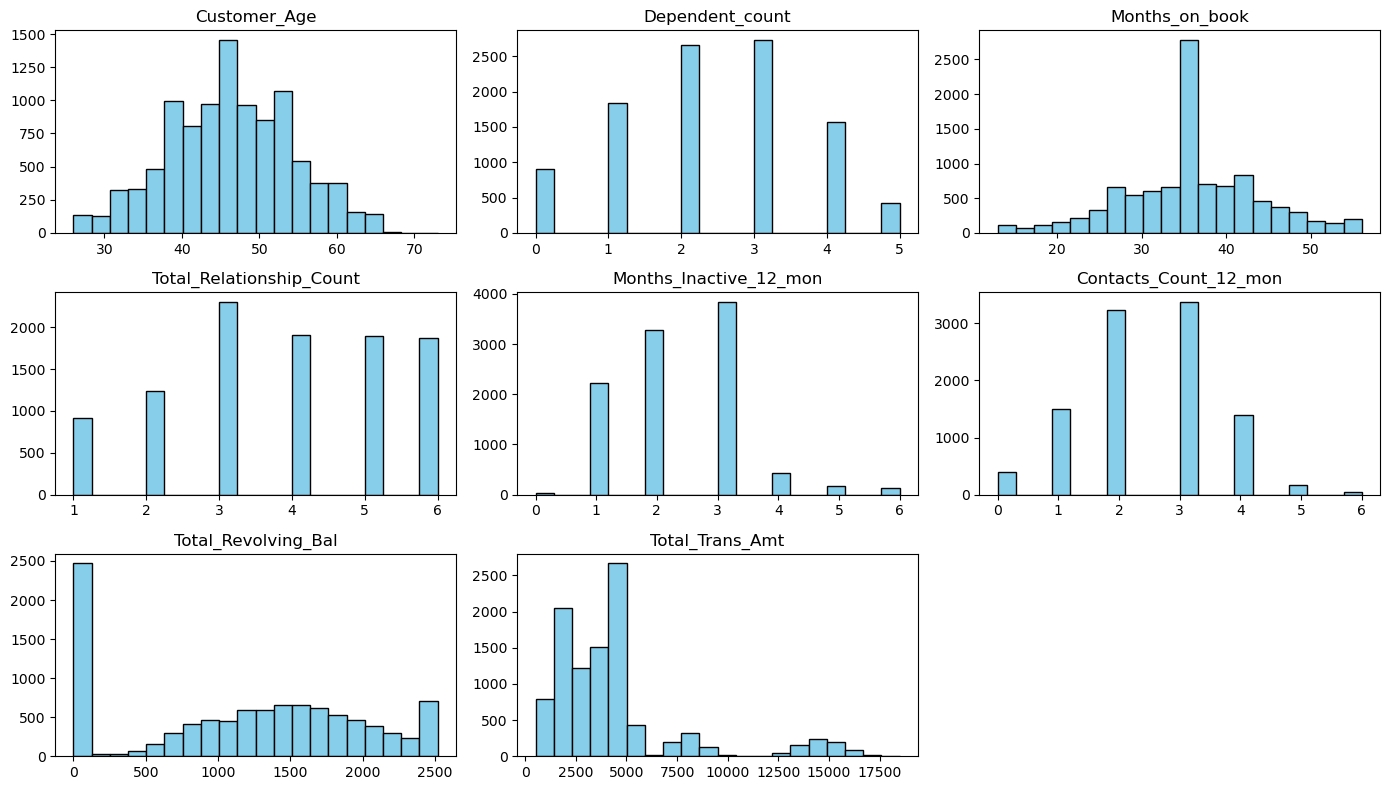

In [14]:
cols = ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt',]
plt.figure(figsize=(14, 8))

for i, col in enumerate(cols):
    plt.subplot(3, 3, i+1)
    plt.hist(data[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)

plt.tight_layout()
plt.show()

- The majority of the bank's customers fall within the age range of 40-50 years old and are either single or have three dependents.
- A large portion of the bank's customers are loyal, active, and have multiple products with the bank.
- Many customers have a low revolving balance and transaction amount, which could suggest that they have a low credit utilization or income level.
- The age and dependent count of customers may influence their behavior and preferences, including the types of products or services they require or use.
- The bank may benefit from enhancing its customer engagement and retention strategies, such as providing more incentives, rewards, or personalized recommendations.
-The bank may benefit from enhancing its customer engagement and retention strategies, such as providing more incentives, rewards, or personalized recommendations


Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_obj = data.select_dtypes(include=np.object_)
for i in data_obj.columns:
    data[i]=le.fit_transform(data[i])

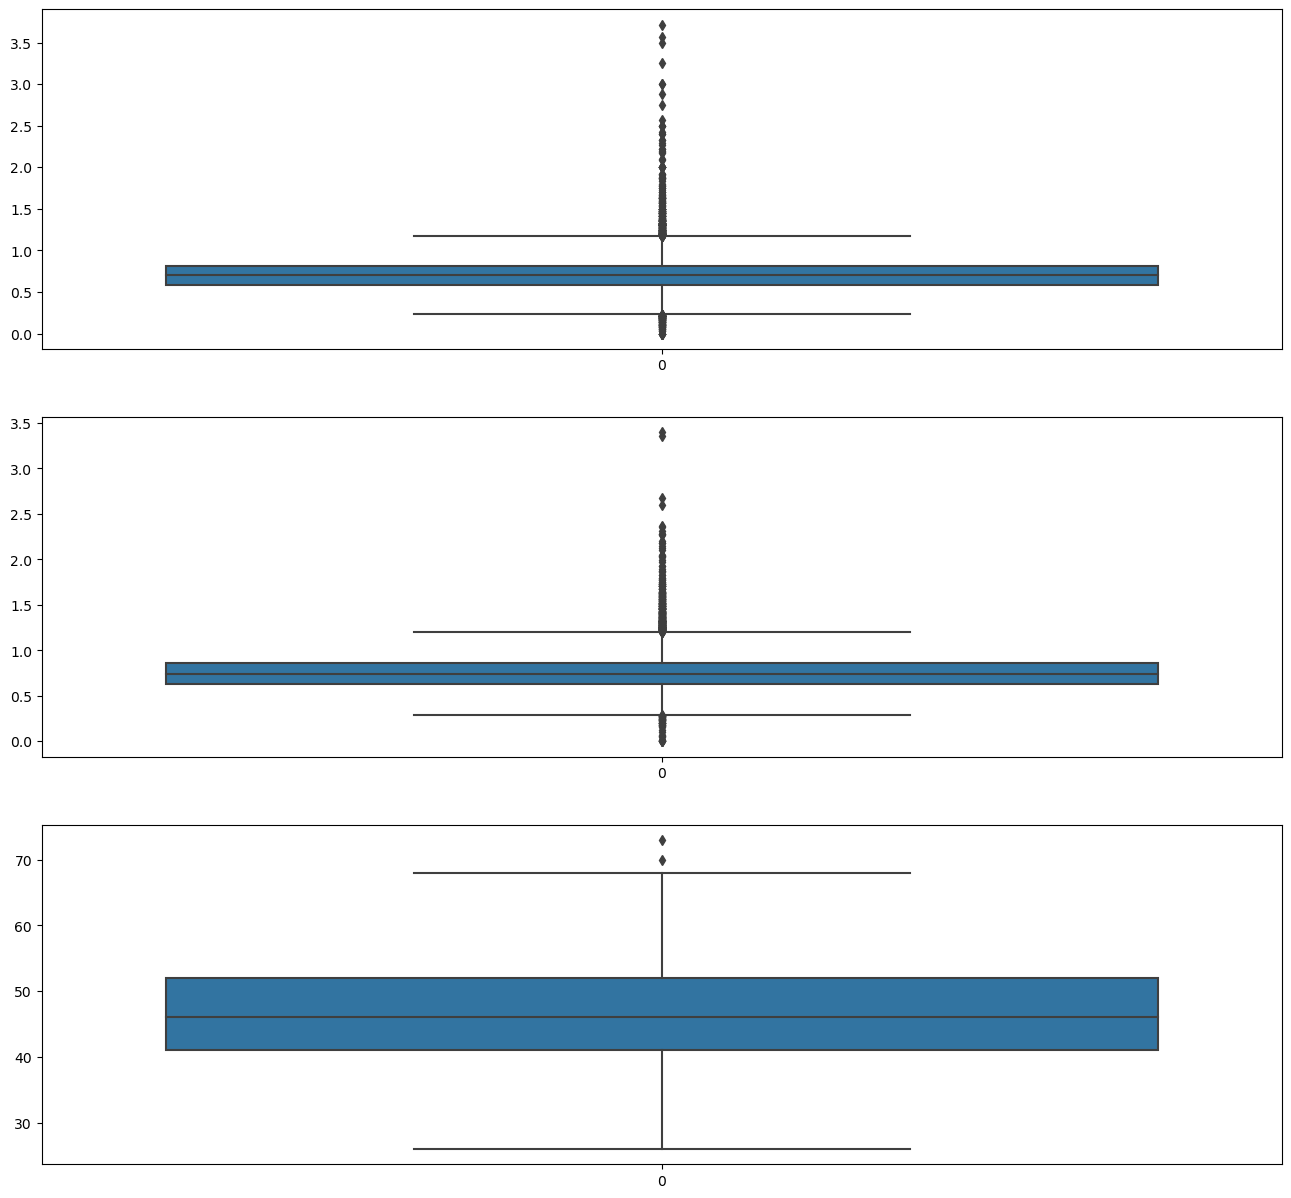

In [16]:
fig, ax = plt.subplots(3,1,figsize=(16,15))

plt1=sns.boxplot(data['Total_Ct_Chng_Q4_Q1'],ax=ax[0])
plt1=sns.boxplot(data['Total_Amt_Chng_Q4_Q1'],ax=ax[1])
plt1=sns.boxplot(data['Customer_Age'],ax=ax[2])
plt.show()

Feature selection

In [17]:
from sklearn.feature_selection import chi2

In [18]:
x=data.drop('Attrition_Flag',axis=1)
y=data.Attrition_Flag

In [19]:
fscore=chi2(x,y)
fscore

(array([4.65489254e+00, 7.44322270e+00, 2.62607132e+00, 3.39231109e-01,
        1.30275451e+00, 2.47516959e+00, 9.86120218e-01, 3.36752569e+00,
        1.44398171e+02, 1.02667123e+02, 2.11039445e+02, 5.52272593e+04,
        4.00235402e+05, 9.10513645e+00, 1.09982951e+01, 7.54246053e+05,
        1.18653660e+04, 6.78028733e+01, 8.91168909e+01, 8.44533428e+03,
        1.60860490e+03]),
 array([3.09651707e-02, 6.36757676e-03, 1.05121532e-01, 5.60273377e-01,
        2.53710693e-01, 1.15656968e-01, 3.20692479e-01, 6.64935511e-02,
        2.90761917e-33, 3.96469806e-24, 8.14875063e-48, 0.00000000e+00,
        0.00000000e+00, 2.54892702e-03, 9.11957362e-04, 0.00000000e+00,
        0.00000000e+00, 1.80685992e-16, 3.72159784e-21, 0.00000000e+00,
        0.00000000e+00]))

In [20]:
p_value= pd.Series(fscore[1],index=x.columns)
p_value

Customer_Age                                                                                                                          3.096517e-02
Gender                                                                                                                                6.367577e-03
Dependent_count                                                                                                                       1.051215e-01
Education_Level                                                                                                                       5.602734e-01
Marital_Status                                                                                                                        2.537107e-01
Income_Category                                                                                                                       1.156570e-01
Card_Category                                                                                                         

In [21]:
irr_cols=[]

for x in p_value.index:
    if p_value[x] <= 0.05:
        print(x, ':- Reject Null Hypothesis')
    else:
        print(x,':- Accept the Hypothesis')
        irr_cols.append(x)

Customer_Age :- Reject Null Hypothesis
Gender :- Reject Null Hypothesis
Dependent_count :- Accept the Hypothesis
Education_Level :- Accept the Hypothesis
Marital_Status :- Accept the Hypothesis
Income_Category :- Accept the Hypothesis
Card_Category :- Accept the Hypothesis
Months_on_book :- Accept the Hypothesis
Total_Relationship_Count :- Reject Null Hypothesis
Months_Inactive_12_mon :- Reject Null Hypothesis
Contacts_Count_12_mon :- Reject Null Hypothesis
Credit_Limit :- Reject Null Hypothesis
Total_Revolving_Bal :- Reject Null Hypothesis
Avg_Open_To_Buy :- Reject Null Hypothesis
Total_Amt_Chng_Q4_Q1 :- Reject Null Hypothesis
Total_Trans_Amt :- Reject Null Hypothesis
Total_Trans_Ct :- Reject Null Hypothesis
Total_Ct_Chng_Q4_Q1 :- Reject Null Hypothesis
Avg_Utilization_Ratio :- Reject Null Hypothesis
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 :- Reject Null Hypothesis
Naive_Bayes_Classifier_Attriti

In [22]:
data.drop(irr_cols,axis=1, inplace=True)

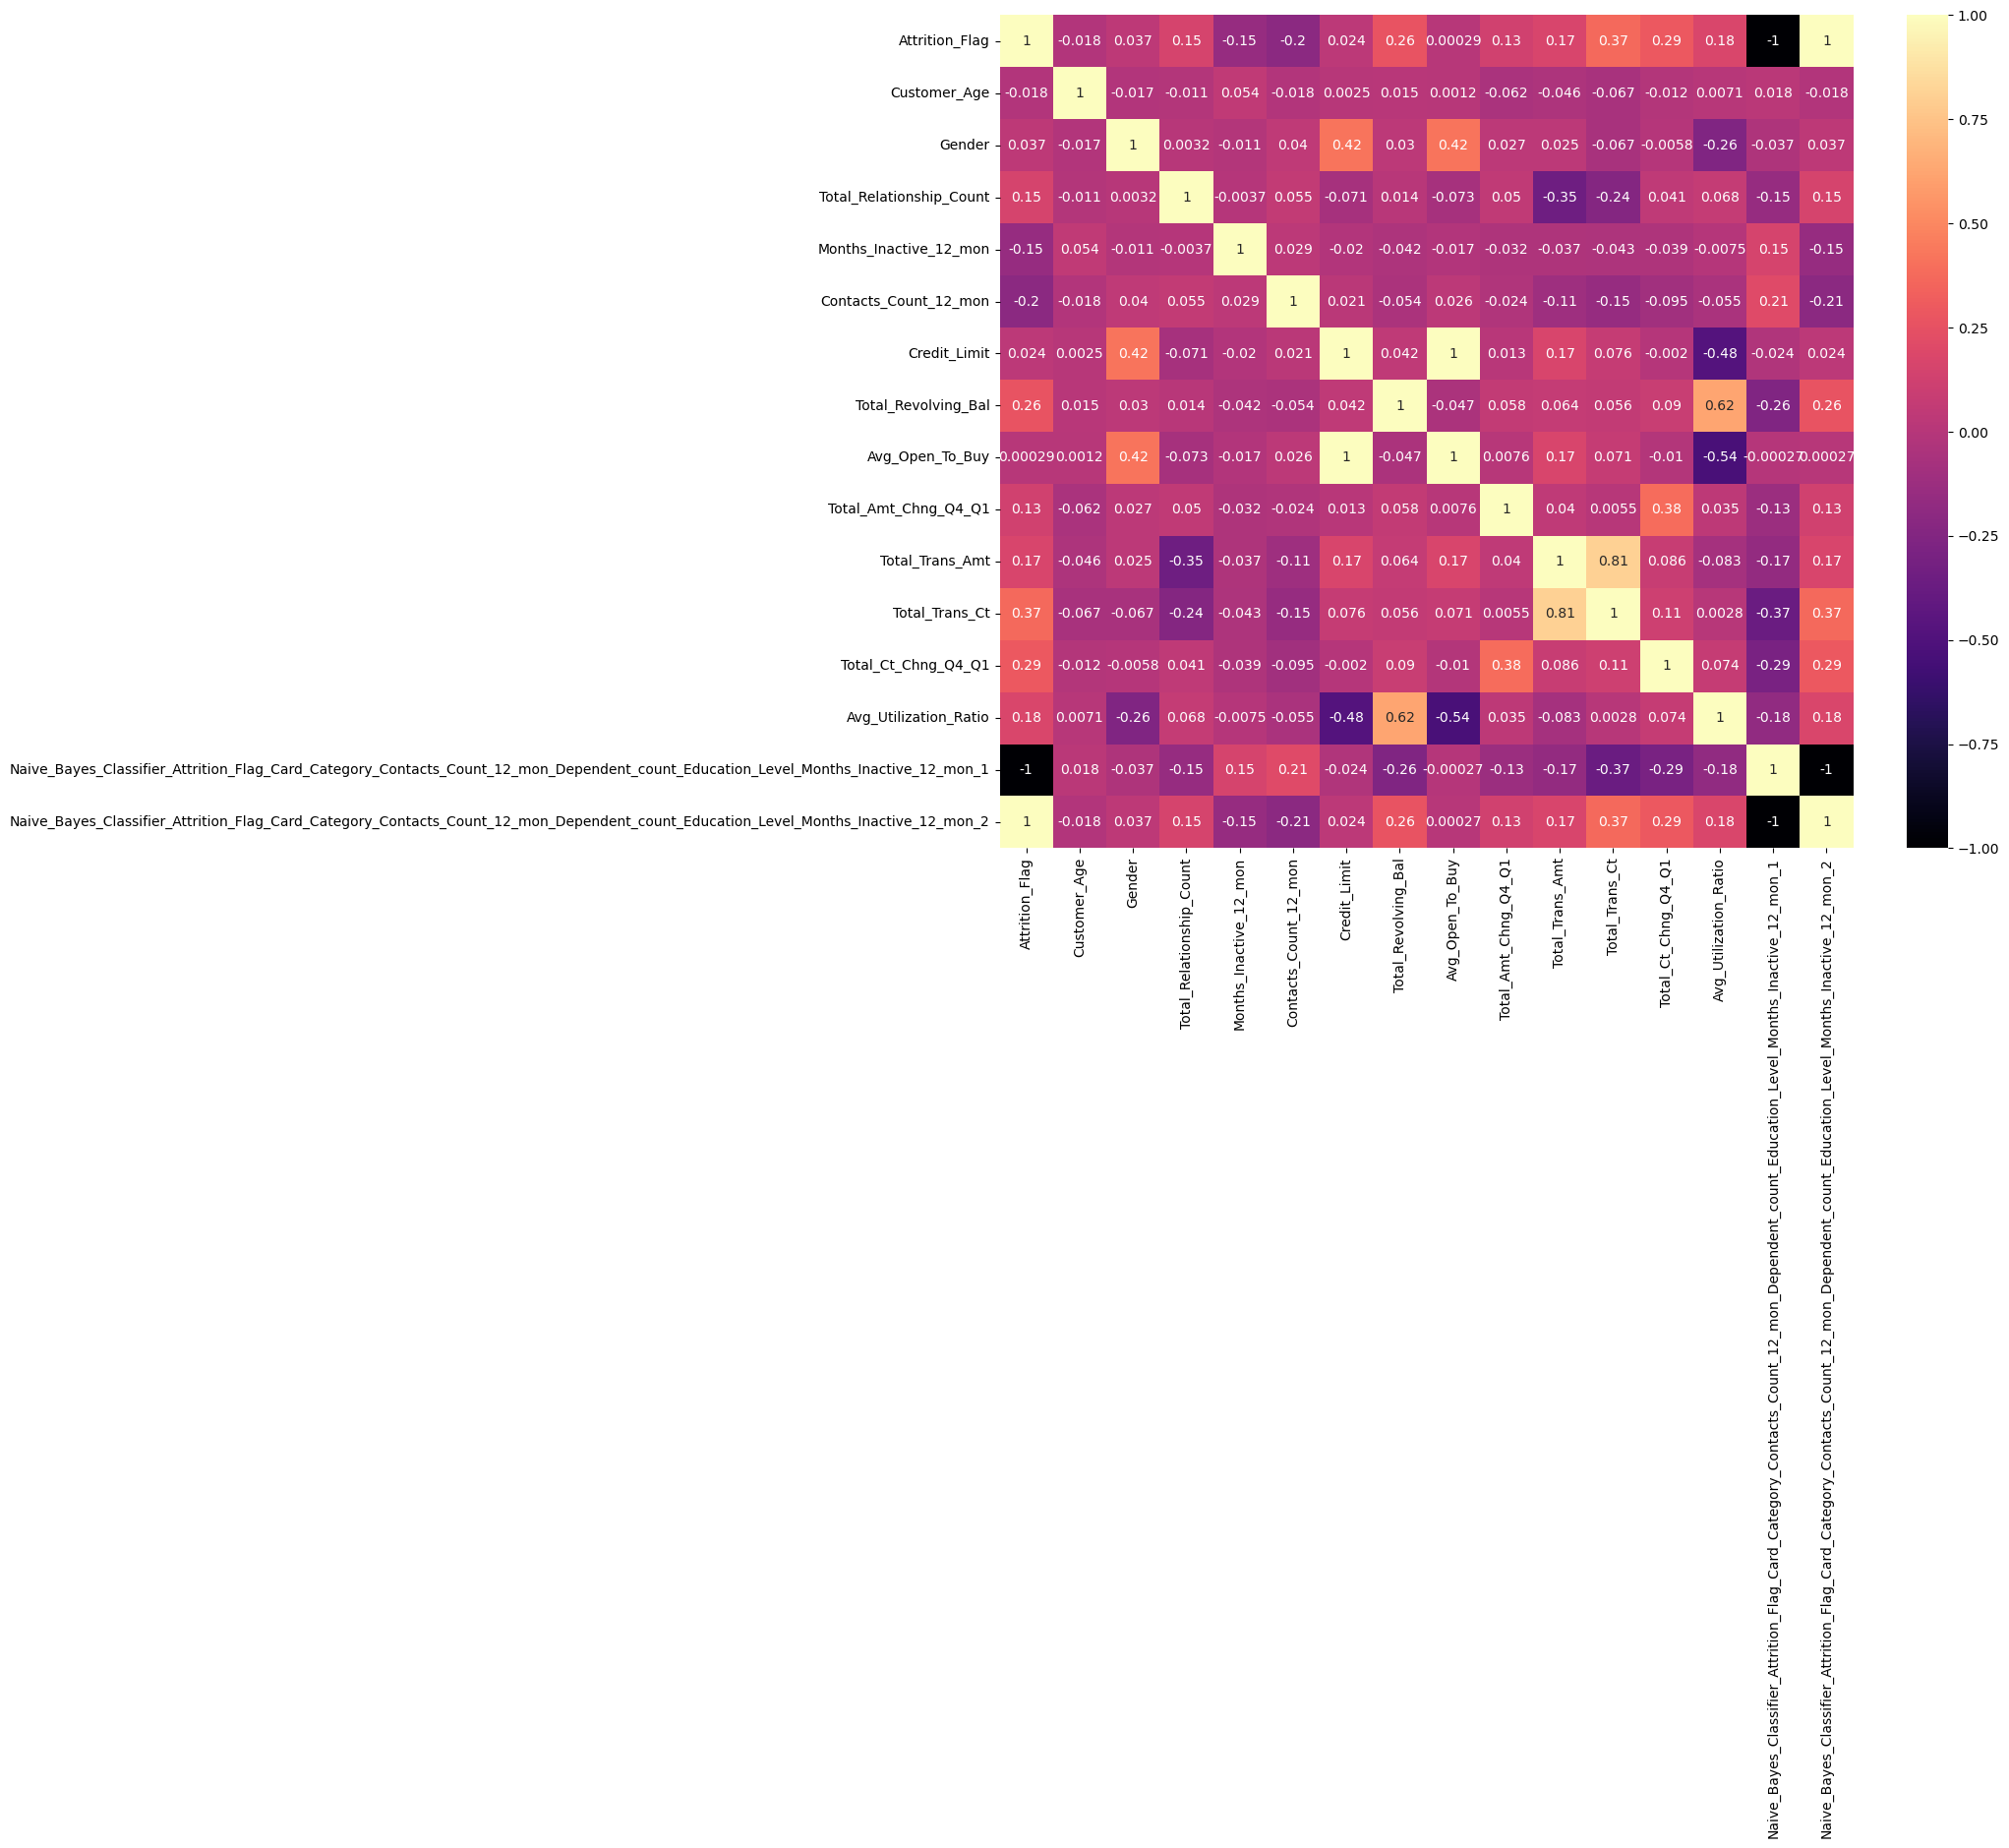

In [23]:
plt.figure(figsize=(14,11))
sns.heatmap(data.corr(),annot=True,cmap='magma')
plt.show()

In [24]:
data.columns.value_counts().sum()

16

after doing chi2 we can see that only 16 columns which are dependent 

Model building

logistic Regression

In [25]:
X = data.drop(columns = ['Attrition_Flag'])
y = data['Attrition_Flag']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred = log_reg.predict(X_test)

In [29]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report

accuracy = accuracy_score(y_test, y_pred)*100
roc_auc_score = roc_auc_score(y_test, y_pred)*100
f1score = f1_score(y_test, y_pred)*100

print(f"Accuracy = {accuracy.round(4)}")
print(f"roc_auc_score = {roc_auc_score.round(4)}")
print(f"F1 Score = {f1score.round(4)}")

Accuracy = 95.0642
roc_auc_score = 88.0433
F1 Score = 97.0964


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       327
           1       0.96      0.98      0.97      1699

    accuracy                           0.95      2026
   macro avg       0.93      0.88      0.90      2026
weighted avg       0.95      0.95      0.95      2026



the accureacy of logistic regression = 95%

Decision Tree


In [31]:
x1 = data.drop(columns = ['Attrition_Flag'])
y1 = data['Attrition_Flag']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5)

In [34]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5)

In [35]:
pred= dt.predict(x_test)
pred

array([1, 1, 1, ..., 1, 1, 1])

In [36]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, pred)*100
roc_auc_score = roc_auc_score(y_test, pred)*100
f1score = f1_score(y_test, pred)*100

print(f"Accuracy = {accuracy.round(4)}")
print(f"roc_auc_score = {roc_auc_score.round(4)}")
print(f"F1 Score = {f1score.round(4)}")

Accuracy = 100.0
roc_auc_score = 100.0
F1 Score = 100.0


In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      1.00      1.00      1699

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



the accuracy of decision tree = 100%

Cross Validation

In [38]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [39]:
max_depth=[int(x) for x in np.linspace(3,50,20)]
min_samples_split=[5,8,10,12,15,20,30,35,40]
param_grid={'max_depth':max_depth, 'min_samples_split':min_samples_split, 'criterion':['entropy','gini impurtity']}

In [40]:
grid_model = GridSearchCV(dt,param_grid,cv=3)

In [41]:
grid_model.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                              min_samples_split=5),
             param_grid={'criterion': ['entropy', 'gini impurtity'],
                         'max_depth': [3, 5, 7, 10, 12, 15, 17, 20, 22, 25, 27,
                                       30, 32, 35, 37, 40, 42, 45, 47, 50],
                         'min_samples_split': [5, 8, 10, 12, 15, 20, 30, 35,
                                               40]})

In [42]:
grid_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5)

In [43]:
grid_model.best_score_

1.0

Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [45]:
x2 = data.drop(columns = ['Attrition_Flag'])
y2 = data['Attrition_Flag']

In [46]:
x_train, x_test, Y_train, Y_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [47]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, Y_train)

RandomForestClassifier(random_state=42)

In [48]:
y_pred = rf.predict(X_test)

In [49]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report

accuracy = accuracy_score(Y_test, pred)*100
roc_auc_score = roc_auc_score(Y_test, pred)*100
f1score = f1_score(Y_test, pred)*100

print(f"Accuracy = {accuracy.round(4)}")
print(f"roc_auc_score = {roc_auc_score.round(4)}")

Accuracy = 100.0
roc_auc_score = 100.0


In [50]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      1.00      1.00      1699

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



the accuracy of the randomforest model is 100%

result

- The Logistic Regression, Decision Tree, and Random Forest models all achieved high accuracy scores, indicating strong performance.
- Before deploying the models, it is recommended to conduct further evaluation on an independent test set, taking into account factors such as model complexity, interpretability, and resource requirements.
- There were no signs of underfitting observed, suggesting that the models effectively learned from the data.
- To ensure real-world performance, it is important to conduct a comprehensive evaluation on an independent test set. Additionally, model interpretability and resource requirements should be considered for deployment.

- The Logistic Regression, Decision Tree, and Random Forest models have all demonstrated exceptional performance. However, it is recommended to conduct further evaluation on an independent test set or through cross-validation before making a final deployment decision. Factors such as model complexity, interpretability, and computational resources should be taken into account.
- None of the models are exhibiting signs of underfitting, as they are all achieving high accuracy scores. Underfitting typically leads to poor performance on both the training and test/validation data.

In [51]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)


SVC()

In [52]:
import pickle
pickle.dump(svc,open('model.pkl','wb'))